<a href="https://colab.research.google.com/github/Mdanish2020/Credit_card_default_prediction/blob/main/ML_Capstone(Classification)Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Let's begin the another journey towards Machine Learning.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

#### Let's invite the data

In [ ]:
# call data from drive
cred_df = pd.read_csv('/content/drive/MyDrive/Data/default of credit card clients.xls - Data.csv')

In [ ]:
# looking at first 5 instances
cred_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


#### Our dataset looks so fuzzy, we have to make some changes like changing to names of columns.

In [ ]:
# Now its time to find out rows and columns 
cred_df.shape

(30001, 25)

Wow! we have 30,001 instances and 25 features including dependent variable to work on...

Let's start further steps.


In [ ]:
# getting all info about the features of credit card dataset
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

### There are 0 null-values in the given dataset. So, we don't have to deal with that.

We have to change the name of columns in order to work properly and with ease.

In [ ]:
# Creating variable with the help of index 0
column_names = list(cred_df.iloc[0].values)
# droping first row 
cred_df.drop(index = cred_df.index[0],axis = 0, inplace = True)
# Reset the columns
cred_df = cred_df.set_axis(column_names,axis = 1)
# Changing the data-types of each features
cred_df = cred_df.astype('int')
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Describing the columns 

* ID: ID of each customer
* LIMIT_BAL: Amount of the given credit (NT dollar)
* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
* PAY_0: Repayment status in September, 2005 (same scale as given)
* PAY_2: Repayment status in August, 2005 (same scale as given)
* PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)
* PAY_5: Repayment status in May, 2005 (same scale as given)
* PAY_6: Repayment status in April, 2005 (same scale as given)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

### Rename the names of features according to the description which is written above, it will make our task easy in Exploratoy data analysis and in further appoaches.
---

In [ ]:
# renaming features
cred_df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                        'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                        'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                        'default payment next month': 'Default_Payments'},inplace = True)

In [ ]:
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Yeah!!!

Now, Our dataset makes much more sense after renaming it.

In [ ]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

In [ ]:
#excluding discrete data
excluded_cols = ['ID','SEX', 'EDUCATION','MARRIAGE', 'REPAY_SEPT','REPAY_AUG','REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']
cred_df1 = cred_df.drop(excluded_cols,axis = 1)

In [ ]:
# descriptive statistics of continous data
cred_df1.describe()

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Total counts of customers default payment
cred_df['Default_Payments'].value_counts()

0    23364
1     6636
Name: Default_Payments, dtype: int64

## **Exploratory Data Analysis**

### **Dependent Variable**

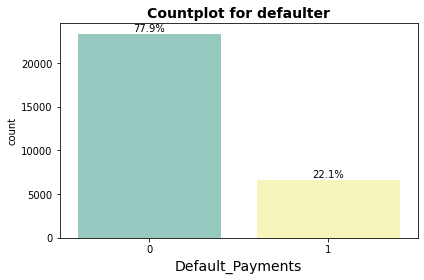

In [ ]:
# Visualizing defaulters
ax = sns.countplot(x = cred_df['Default_Payments'],palette = 'Set3')
plt.xlabel('Default_Payments',fontsize = 14)
plt.title('Countplot for defaulter',fontweight = 'bold',fontsize = 14)

total = len(cred_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

#### Countplot shows that the customer is defaulter or not, **1** denotes the defaulter and **0** refers to who are not defaulters.

#### As it can be seen clearly in *Countplot* that data is imbalanced.

#### Imbalanced data leads us to the wrong prediction as we know that  **Logistic** and **Random Forest** have a bias nature towards the majority class it may be misclassified while fiting the model.

### **Independent variables**

#### Let's have some insights of categorical feature.

In [ ]:
# Sex
cred_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Education
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, counts of 0,4,5,6 comes in others category so we'll merge all this in one category.

In [ ]:
# Converting Education feature into 4 possible classes
fil = ((cred_df['EDUCATION'] == 0) | (cred_df['EDUCATION'] >= 5))
cred_df.loc[fil, 'EDUCATION'] = 4
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### It looks much better now.

In [ ]:
# Marriage
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to description of dataset 0 is also comes in others classification. So, I am going add 0 classification with 3.

In [ ]:
# Converting Marriage feature into 3 ossible classifiation
fil_1 = cred_df['MARRIAGE'] == 0
cred_df.loc[fil_1, 'MARRIAGE'] = 3
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Creating a dataframe with categorical features and dependent variable 
categorical_features = ['SEX','EDUCATION','MARRIAGE']
df_cat = cred_df[categorical_features]
df_cat['Defaulters'] = cred_df['Default_Payments']
df_cat.head(3) 

,SEX,EDUCATION,MARRIAGE,Defaulters
1,2,2,1,1
2,2,2,2,1
3,2,2,2,0


There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features.

In [ ]:
# Now replace the classification denotion 
df_cat['SEX'].replace({1 : 'Male',2 : 'Female'}, inplace = True)
df_cat['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'},inplace = True)
df_cat['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'},inplace = True)

### **Plotting all these Categorical features with Dependent variable**

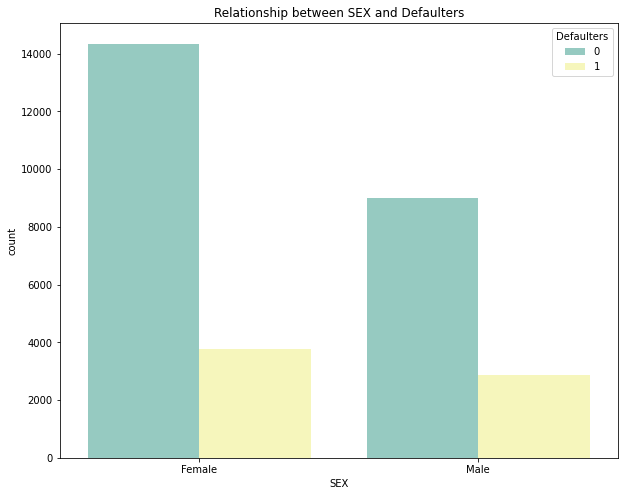

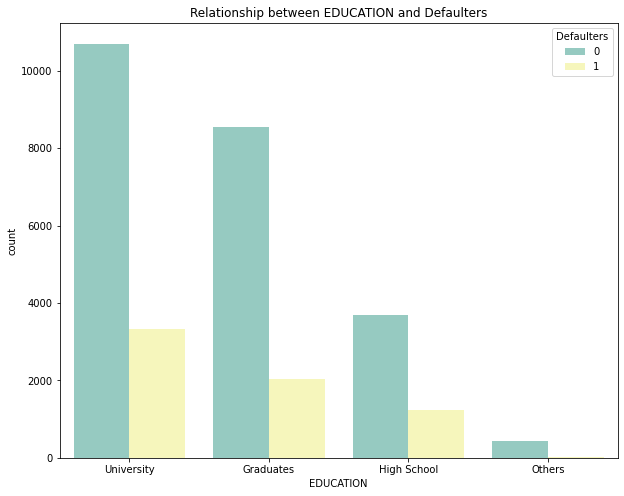

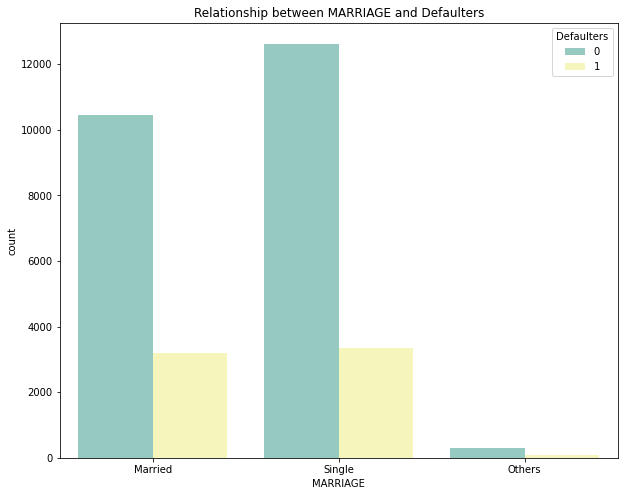

In [ ]:
# categorical features with dependent variable 
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Defaulters', data = df_cat,palette = "Set3")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

### Insights of categorical feature with dependent variable 

* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
* University and Graduates are holding high proportions of Credit cards.
* Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### **PAYMENT HISTORY ACCORDING TO MONTHS**
---

### Having insights of Pay scale with Default Payments 

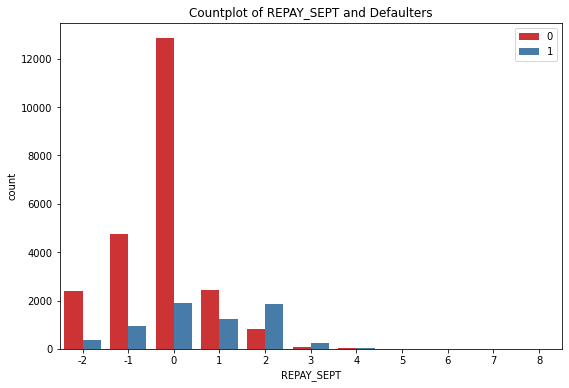

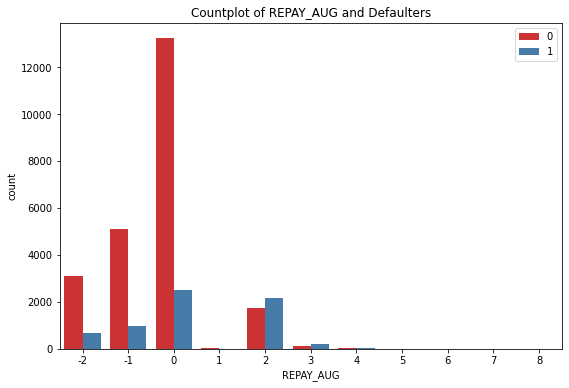

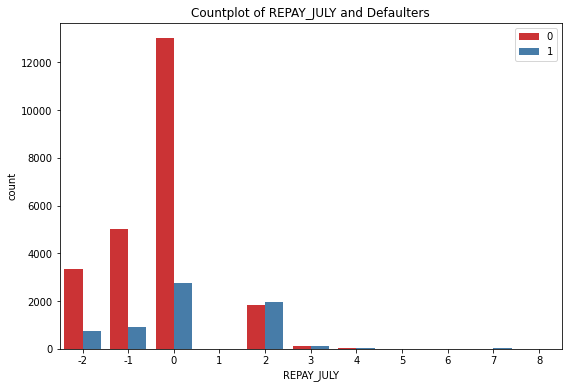

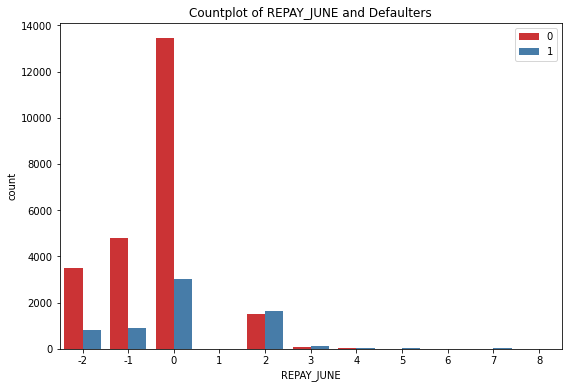

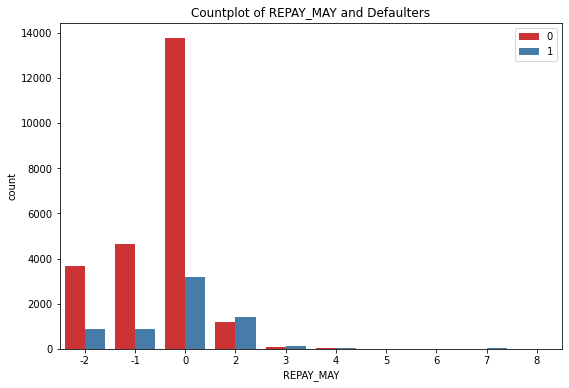

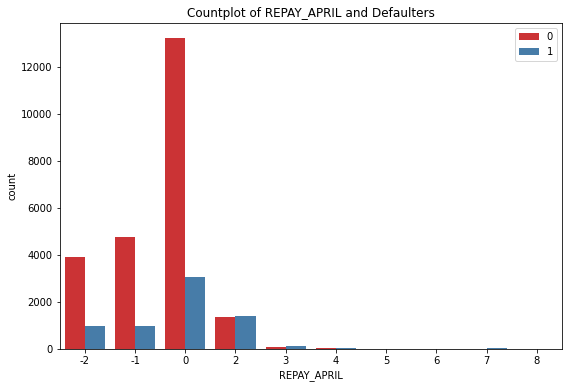

In [ ]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,6))
  sns.countplot(x = col, hue = 'Default_Payments',data = cred_df,palette = 'Set1')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')
  

### Describing the Xlabel of Repay scale

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

---

### **Continous Independent Features with Dependent Variable**
---
---

### **AGE**

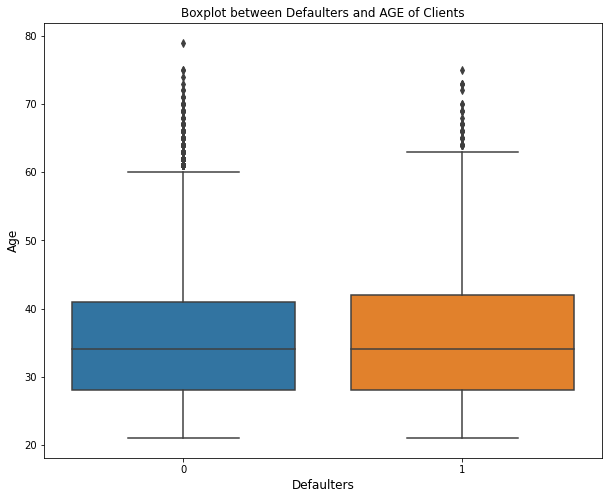

In [ ]:
# Boxplot AGE vs Defaulters
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Default_Payments',y = 'AGE',data = cred_df)
plt.title('Boxplot between Defaulters and AGE of Clients')
plt.xlabel('Defaulters',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.show()

* Median shows that our poplutaion of defaulters and not defaulters are around 35 years
* Two many outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

#### **LIMIT BALANCE**

Text(0, 0.5, 'Counts of defaulters')

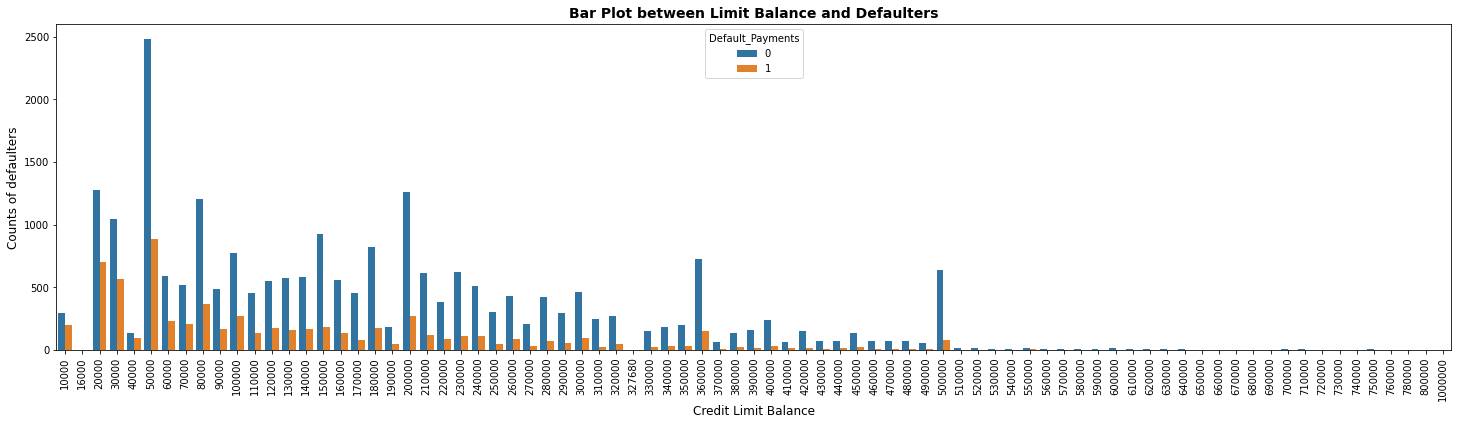

In [ ]:
# Limit Balance 
plt.figure(figsize = (25,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = cred_df,)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)

* Majority of the defaulters are those who have credit limit balance between 20,000 to 2,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

### **Lets Visualize the rest features of bill payments and amount of previous payments of different months**

**BILL AMOUNT**

In [ ]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
cred_df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* Defaulters do not have average bill payment amount not more than 48,000(NT Dollar)
* The most concerned area about the defaulters are around the average bill amount. 

In [ ]:
# min bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].min()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,-165580,-69777,-157264,-170000,-81334,-209051
1,-6676,-17710,-61506,-65167,-53007,-339603


In [ ]:
# Max bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].max()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,964511,983931,1664089,891586,927171,961664
1,613860,581775,578971,548020,547880,514975


from above matrix we can conclude that defaulters lie within the range of maximum Bill Payment of approximately 60,000(NT Dollar)

In [ ]:
# pairplot of BILL AMOUNT of different months
sns.pairplot(cred_df[bill_amt])

---
**PAYMENT AMOUNT**

In [ ]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
cred_df.groupby("Default_Payments")[pay_amt].mean()

* Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* The most concerned area about the defaulters are around the average previous bill payment amount.

In [ ]:
# minimum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].min()

In [ ]:
# maximum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].max()

from above matrix we can conclude that defaulters lie within the range of maximum previous bill Payment of approximately 50,000(NT Dollar)

In [ ]:
# pairplpot of PREVIOUS PAYMENT of different months 
sns.pairplot(data = cred_df[pay_amt]) 

---
## **ONE-HOT ENCODING**
---
 One-hot encoding is a technique which is used to convert or transform a categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0. It is also called as dummy encoding as the features created as part of these techniques are dummy features which don’t represent any real world features. Rather they are created for encoding the different values of categorical feature using dummy numerical features. The primary need for using one-hot encoding technique is to transform or convert the categorical features into numerical features such that machine learning libraries can use the values to train the model.
 [One-hot encoding](https://vitalflux.com/one-hot-encoding-concepts-python-code-examples/#:~:text=Here%20is%20the%20summary%20of%20this%20post%3A%201,is%20used%20for%20one-hot%20encoding.%20More%20items...%20)

In [ ]:
# making a copy of dataset
cred_dup_df = cred_df.copy()

In [ ]:
# Transform features Marriage, Age and Education using one-hot-encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])

In [ ]:
# Transform features of repayment of different months using one-hot encoding
cred_dup_df = pd.get_dummies(cred_dup_df, columns = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL'])

In [ ]:
cred_dup_df.head(3)

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,REPAY_SEPT_-2,REPAY_SEPT_-1,REPAY_SEPT_0,REPAY_SEPT_1,REPAY_SEPT_2,REPAY_SEPT_3,REPAY_SEPT_4,REPAY_SEPT_5,REPAY_SEPT_6,REPAY_SEPT_7,REPAY_SEPT_8,REPAY_AUG_-2,REPAY_AUG_-1,REPAY_AUG_0,REPAY_AUG_1,...,REPAY_JULY_0,REPAY_JULY_1,REPAY_JULY_2,REPAY_JULY_3,REPAY_JULY_4,REPAY_JULY_5,REPAY_JULY_6,REPAY_JULY_7,REPAY_JULY_8,REPAY_JUNE_-2,REPAY_JUNE_-1,REPAY_JUNE_0,REPAY_JUNE_1,REPAY_JUNE_2,REPAY_JUNE_3,REPAY_JUNE_4,REPAY_JUNE_5,REPAY_JUNE_6,REPAY_JUNE_7,REPAY_JUNE_8,REPAY_MAY_-2,REPAY_MAY_-1,REPAY_MAY_0,REPAY_MAY_2,REPAY_MAY_3,REPAY_MAY_4,REPAY_MAY_5,REPAY_MAY_6,REPAY_MAY_7,REPAY_MAY_8,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
1,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### *Preparing data for Data Split*

In [ ]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)

In [ ]:
cred_dup_df.head(3)

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS,REPAY_SEPT_-2,REPAY_SEPT_-1,REPAY_SEPT_0,REPAY_SEPT_1,REPAY_SEPT_2,REPAY_SEPT_3,REPAY_SEPT_4,REPAY_SEPT_5,REPAY_SEPT_6,REPAY_SEPT_7,REPAY_SEPT_8,REPAY_AUG_-2,REPAY_AUG_-1,REPAY_AUG_0,REPAY_AUG_1,...,REPAY_JULY_0,REPAY_JULY_1,REPAY_JULY_2,REPAY_JULY_3,REPAY_JULY_4,REPAY_JULY_5,REPAY_JULY_6,REPAY_JULY_7,REPAY_JULY_8,REPAY_JUNE_-2,REPAY_JUNE_-1,REPAY_JUNE_0,REPAY_JUNE_1,REPAY_JUNE_2,REPAY_JUNE_3,REPAY_JUNE_4,REPAY_JUNE_5,REPAY_JUNE_6,REPAY_JUNE_7,REPAY_JUNE_8,REPAY_MAY_-2,REPAY_MAY_-1,REPAY_MAY_0,REPAY_MAY_2,REPAY_MAY_3,REPAY_MAY_4,REPAY_MAY_5,REPAY_MAY_6,REPAY_MAY_7,REPAY_MAY_8,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
1,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# drop the features that are in no use
cred_dup_df.drop(['ID','EDUCATION_OTHERS','MARRIAGE_OTHERS'],axis = 1,inplace = True)

In [ ]:
cred_dup_df.head(3)

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,MALE,FEMALE,SINGLE,MARRIED,REPAY_SEPT_-2,REPAY_SEPT_-1,REPAY_SEPT_0,REPAY_SEPT_1,REPAY_SEPT_2,REPAY_SEPT_3,REPAY_SEPT_4,REPAY_SEPT_5,REPAY_SEPT_6,REPAY_SEPT_7,REPAY_SEPT_8,REPAY_AUG_-2,REPAY_AUG_-1,REPAY_AUG_0,REPAY_AUG_1,REPAY_AUG_2,REPAY_AUG_3,REPAY_AUG_4,...,REPAY_JULY_0,REPAY_JULY_1,REPAY_JULY_2,REPAY_JULY_3,REPAY_JULY_4,REPAY_JULY_5,REPAY_JULY_6,REPAY_JULY_7,REPAY_JULY_8,REPAY_JUNE_-2,REPAY_JUNE_-1,REPAY_JUNE_0,REPAY_JUNE_1,REPAY_JUNE_2,REPAY_JUNE_3,REPAY_JUNE_4,REPAY_JUNE_5,REPAY_JUNE_6,REPAY_JUNE_7,REPAY_JUNE_8,REPAY_MAY_-2,REPAY_MAY_-1,REPAY_MAY_0,REPAY_MAY_2,REPAY_MAY_3,REPAY_MAY_4,REPAY_MAY_5,REPAY_MAY_6,REPAY_MAY_7,REPAY_MAY_8,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### **DIVIDING DATASETS INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
#independent variables
X = cred_dup_df.drop(['Default_Payments'],axis = 1)
# dependent variable 
y = cred_dup_df['Default_Payments']

### **SPLITTING *X* and *y* INTO TRAINING AND TESTING DATASETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [ ]:
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(21000, 85)
Shape of y_train:(21000,)
Shape of X_test:(9000, 85)
Shape of y_test:(9000,)


### As I mentioned above that we have imbalanced dataset that can lead towards biasness while building the model. 

### To balance our dataset we'll use **SMOTE**.

---
## **SMOTE**(Synthetic Minority Oversampling Technique)
---

In [ ]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())


Dataset Before: 0    16364
1     4636
Name: Default_Payments, dtype: int64

Dataset After: 1    16364
0    16364
Name: Default_Payments, dtype: int64


---
---
Our Training data is perfectly Balanced. 

Now we can implement different algorithms 

## **LOGISTIC REGRESSION**
---
Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple(underfitting),  This parameter signifies strength of the regularization and takes a positive float value. C and regularization strength are negatively correlated (smaller the C is stronger the regularization will be).

In [104]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [105]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.5)

In [106]:
# Best parameters 
logistic_grid_model.best_params_                        #it will give you the best one among all parameters

{'C': 0.5, 'penalty': 'l2'}

In [107]:
logistic_grid_model.best_score_

0.5804298843164691